In [33]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer


In [17]:
x_train = pd.read_csv('Train_60/X_Train_Data_Input.csv')
y_train = pd.read_csv('Train_60/Y_Train_Data_Target.csv')
x_train['target'] = y_train['target']

In [18]:
x_train['target'].value_counts()

target
0    711100
1     74033
Name: count, dtype: int64

In [19]:
x_train['Column9']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
785128   NaN
785129   NaN
785130   NaN
785131   NaN
785132   NaN
Name: Column9, Length: 785133, dtype: float64

In [20]:
x_train = x_train.drop(['ID', 'Column9'], axis = 1)

In [21]:
x_train.isnull().sum()

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [22]:
x_train['target'].value_counts()

target
0    711100
1     74033
Name: count, dtype: int64

In [23]:
indices_to_drop = []
for i in range(len(x_train)):
    if pd.isna(x_train.loc[i, 'Column14']) and x_train.loc[i, 'target'] == 0:
        indices_to_drop.append(i)

x_train = x_train.drop(indices_to_drop)
x_train.reset_index(drop=True, inplace=True)

In [24]:
x_train.isnull().sum()

Column0         0
Column1         0
Column2         0
Column3     37429
Column4     37808
Column5     22548
Column6       523
Column7         0
Column8       523
Column10        0
Column11        0
Column12        0
Column13        0
Column14    61053
Column15     7193
Column16        0
Column17        0
Column18        0
Column19        0
Column20        0
Column21        0
target          0
dtype: int64

In [25]:
x_train['target'].value_counts()

target
0    406450
1     74033
Name: count, dtype: int64

In [28]:
indices_to_drop = []

columns_to_check = ['Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15']

for i in range(len(x_train)):
    if x_train.loc[i, 'target'] == 0 and any(pd.isna(x_train.loc[i, col]) for col in columns_to_check):
        indices_to_drop.append(i)

x_train = x_train.drop(indices_to_drop)
x_train.reset_index(drop=True, inplace=True)

In [29]:
x_train.isnull().sum()

Column0         0
Column1         0
Column2         0
Column3     37269
Column4     37565
Column5     19496
Column6       523
Column7         0
Column8       523
Column10        0
Column11        0
Column12        0
Column13        0
Column14    61053
Column15     7193
Column16        0
Column17        0
Column18        0
Column19        0
Column20        0
Column21        0
target          0
dtype: int64

In [31]:
x_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,477212.000000,477212.000000,477212.000000,439943.000000,439647.000000,457716.000000,476689.000000,477212.000000,476689.000000,477212.000000,...,477212.000000,416159.000000,470019.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000
mean,0.496389,1489.920870,3063.773472,0.264028,0.303078,-0.000764,0.080876,0.004385,0.379620,0.307576,...,0.439557,-0.000880,-0.002047,0.001834,0.416253,0.203356,0.025794,0.015039,0.004424,0.155137
std,1.179677,923.824686,2212.405809,0.757299,0.755119,1.083979,0.999926,1.205594,1.135656,0.461491,...,0.496334,1.296267,1.636692,0.042976,3.885463,0.485789,0.158519,0.121710,0.066363,0.362035
min,0.000000,-936.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,0.000000,...,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,624.000000,1159.000000,0.227021,0.275215,-0.007469,-0.407939,-0.015607,0.120922,0.000000,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1569.000000,2864.500000,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.451434,0.000000,...,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2495.000000,4702.000000,0.678139,0.701403,-0.007468,-0.053357,-0.015606,0.824408,1.000000,...,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,2495.000000,10131.000000,0.678139,0.701403,551.421127,3.804757,201.687947,323.992484,1.000000,...,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
knn = KNNImputer()
x_train_knn = knn.fit_transform(x_train)

In [180]:
no_null_x_train = x_train.copy()
no_null_x_train[:] = pd.DataFrame(x_train_knn, columns=x_train.columns, index=x_train.index)

/var/folders/qr/80j1cy4s5q542dmdc5lwzzqc0000gn/T/ipykernel_5556/595961532.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         2495.0
1         2495.0
2         2495.0
3          211.0
4         2495.0
           ...  
477207    2467.0
477208     824.0
477209    2495.0
477210    2495.0
477211    2480.0
Name: Column1, Length: 477212, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  no_null_x_train[:] = pd.DataFrame(x_train_knn, columns=x_train.columns, index=x_train.index)
/var/folders/qr/80j1cy4s5q542dmdc5lwzzqc0000gn/T/ipykernel_5556/595961532.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
477207    0.0
477208    0.0
477209    1.0
477210    0.0
477211    1.0
Name: Column10, Length: 477212, dt

In [181]:
pd.set_option('display.max_columns', None)
no_null_x_train.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
count,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000,477212.000000
mean,0.496389,1489.920870,3063.773472,0.197186,0.226838,-0.000870,0.080420,0.004385,0.378561,0.307576,0.408043,0.496492,0.439557,-0.000590,-0.001965,0.001834,0.416253,0.203356,0.025794,0.015039,0.004424,0.155137
std,1.179677,923.824686,2212.405809,0.781976,0.789028,1.063910,0.999505,1.205594,1.135539,0.461491,0.491472,0.499988,0.496334,1.210513,1.624310,0.042976,3.885463,0.485789,0.158519,0.121710,0.066363,0.362035
min,0.000000,-936.000000,-47.000000,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,0.000000,0.000000,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,624.000000,1159.000000,0.001462,0.062121,-0.007469,-0.407939,-0.015607,0.118791,0.000000,0.000000,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1569.000000,2864.500000,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.450800,0.000000,0.000000,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2495.000000,4702.000000,0.678139,0.701403,-0.007468,-0.054184,-0.015606,0.823893,1.000000,1.000000,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,2495.000000,10131.000000,0.678139,0.701403,551.421127,3.804757,201.687947,323.992484,1.000000,1.000000,1.000000,1.000000,8.514416,0.012736,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
no_null_x_train['target'].value_counts()

target
0.0    403179
1.0     74033
Name: count, dtype: int64

column = {'Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16',
       'Column17', 'Column18', 'Column19', 'Column20', 'Column21',
       'target'}
x_train_knn1.rename(columns = {0:'Column0', 1:'Column1', 2:'Column2', 3:'Column3', 4:'Column4', 5:'Column5',
       6:'Column6', 7:'Column7', 8:'Column8', 9:'Column10', 10:'Column11',
       11:'Column12', 12:'Column13', 13:'Column14', 14:'Column15', 15:'Column16',
       16:'Column17', 17:'Column18', 18:'Column19', 19:'Column20', 20:'Column21',
       21:'target'}, inplace = True)

# -----> C1 Removing Outliers (Highest Negative Correlated with Labels)
col1 = no_null_x_train['Column1'].loc[no_null_x_train['target'] == 1].values
q25, q75 = np.percentile(col1, 25), np.percentile(col1, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
col1_iqr = q75 - q25
col1_cut_off = col1_iqr * 3.0
col1_lower, col1_upper = q25 - col1_cut_off, q75 + col1_cut_off
outliers = [x for x in col1 if x < col1_lower or x > col1_upper]
print('Feature C1 Outliers for Fraud Cases: {}'.format(len(outliers)))
no_null_x_train = no_null_x_train.drop(no_null_x_train[(no_null_x_train['Column1'] > col1_upper) | (no_null_x_train['Column1'] < col1_lower)].index)

# -----> C4 Removing Outliers (Highest Negative Correlated with Labels)
col4 = no_null_x_train['Column4'].loc[no_null_x_train['target'] == 1].values
q25, q75 = np.percentile(col4, 25), np.percentile(col4, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
col4_iqr = q75 - q25
col4_cut_off = col4_iqr * 3.0
col4_lower, col4_upper = q25 - col4_cut_off, q75 + col4_cut_off
outliers = [x for x in col4 if x < col4_lower or x > col4_upper]
print('Feature C4 Outliers for Fraud Cases: {}'.format(len(outliers)))
no_null_x_train = no_null_x_train.drop(no_null_x_train[(no_null_x_train['Column4'] > col4_upper) | (no_null_x_train['Column4'] < col4_lower)].index)

# -----> C8 Removing Outliers (Highest Negative Correlated with Labels)
col8 = no_null_x_train['Column8'].loc[no_null_x_train['target'] == 1].values
q25, q75 = np.percentile(col8, 25), np.percentile(col8, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
col8_iqr = q75 - q25
col8_cut_off = col8_iqr * 3.0
col8_lower, col8_upper = q25 - col8_cut_off, q75 + col8_cut_off
outliers = [x for x in col8 if x < col8_lower or x > col8_upper]
print('Feature C8 Outliers for Fraud Cases: {}'.format(len(outliers)))
no_null_x_train = no_null_x_train.drop(no_null_x_train[(no_null_x_train['Column8'] > col8_upper) | (no_null_x_train['Column8'] < col8_lower)].index)

# -----> C18 Removing Outliers (Highest Negative Correlated with Labels)
col18 = no_null_x_train['Column18'].loc[no_null_x_train['target'] == 1].values
q25, q75 = np.percentile(col18, 25), np.percentile(col18, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
col18_iqr = q75 - q25
col18_cut_off = col18_iqr * 3.0
col18_lower, col18_upper = q25 - col18_cut_off, q75 + col18_cut_off
outliers = [x for x in col18 if x < col18_lower or x > col18_upper]
print('Feature C18 Outliers for Fraud Cases: {}'.format(len(outliers)))
no_null_x_train = no_null_x_train.drop(no_null_x_train[(no_null_x_train['Column18'] > col18_upper) | (no_null_x_train['Column18'] < col18_lower)].index)


# Initialize lists to store indices of outliers
outlier_indices = []

# -----> C1 Removing Outliers
col1 = no_null_x_train['Column1'].loc[no_null_x_train['target'] == 1]
q25, q75 = np.percentile(col1, 25), np.percentile(col1, 75)
col1_iqr = q75 - q25
col1_cut_off = col1_iqr * 3.0
col1_lower, col1_upper = q25 - col1_cut_off, q75 + col1_cut_off
outliers_col1 = no_null_x_train[(no_null_x_train['Column1'] > col1_upper) | (no_null_x_train['Column1'] < col1_lower)].index
outlier_indices.extend(outliers_col1)

# -----> C4 Removing Outliers
col4 = no_null_x_train['Column4'].loc[no_null_x_train['target'] == 1]
q25, q75 = np.percentile(col4, 25), np.percentile(col4, 75)
col4_iqr = q75 - q25
col4_cut_off = col4_iqr * 3.0
col4_lower, col4_upper = q25 - col4_cut_off, q75 + col4_cut_off
outliers_col4 = no_null_x_train[(no_null_x_train['Column4'] > col4_upper) | (no_null_x_train['Column4'] < col4_lower)].index
outlier_indices.extend(outliers_col4)

# -----> C8 Removing Outliers
col8 = no_null_x_train['Column8'].loc[no_null_x_train['target'] == 1]
q25, q75 = np.percentile(col8, 25), np.percentile(col8, 75)
col8_iqr = q75 - q25
col8_cut_off = col8_iqr * 3.0
col8_lower, col8_upper = q25 - col8_cut_off, q75 + col8_cut_off
outliers_col8 = no_null_x_train[(no_null_x_train['Column8'] > col8_upper) | (no_null_x_train['Column8'] < col8_lower)].index
outlier_indices.extend(outliers_col8)

# -----> C18 Removing Outliers
col18 = no_null_x_train['Column18'].loc[no_null_x_train['target'] == 1]
q25, q75 = np.percentile(col18, 25), np.percentile(col18, 75)
col18_iqr = q75 - q25
col18_cut_off = col18_iqr * 3.0
col18_lower, col18_upper = q25 - col18_cut_off, q75 + col18_cut_off
outliers_col18 = no_null_x_train[(no_null_x_train['Column18'] > col18_upper) | (no_null_x_train['Column18'] < col18_lower)].index
outlier_indices.extend(outliers_col18)

# Remove duplicates from outlier indices
unique_outlier_indices = list(set(outlier_indices))

# Drop unique outliers from DataFrame
no_null_x_train = no_null_x_train.drop(unique_outlier_indices)


In [183]:
no_null_x_train = no_null_x_train.sample(frac=1)
one = no_null_x_train.loc[no_null_x_train['target'] == 1]
zero = no_null_x_train.loc[no_null_x_train['target'] == 0].sample(n=74033, random_state=42)

normal_distributed_df = pd.concat([one, zero])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
#new_df=new_df.drop(['ID', 'Column9'], axis=1)

In [184]:
new_df['target'].value_counts()

target
1.0    74033
0.0    74033
Name: count, dtype: int64

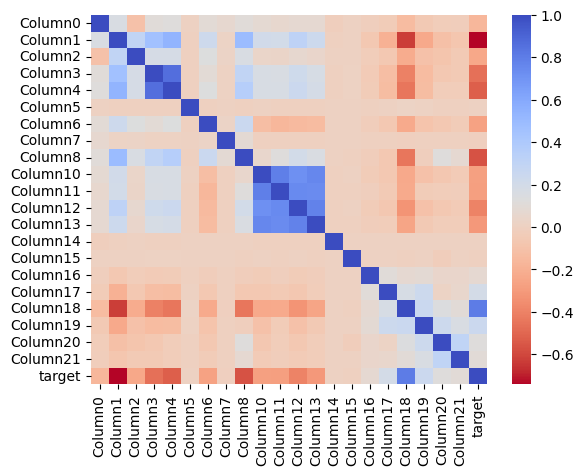

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In [141]:
import time
from sklearn.manifold import TSNE

x_tsne = new_df.drop('target', axis=1)
y_tsne = new_df['target']


# T-SNE Implementation
t0 = time.time()
x_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(x_tsne.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 3.4e+02 s


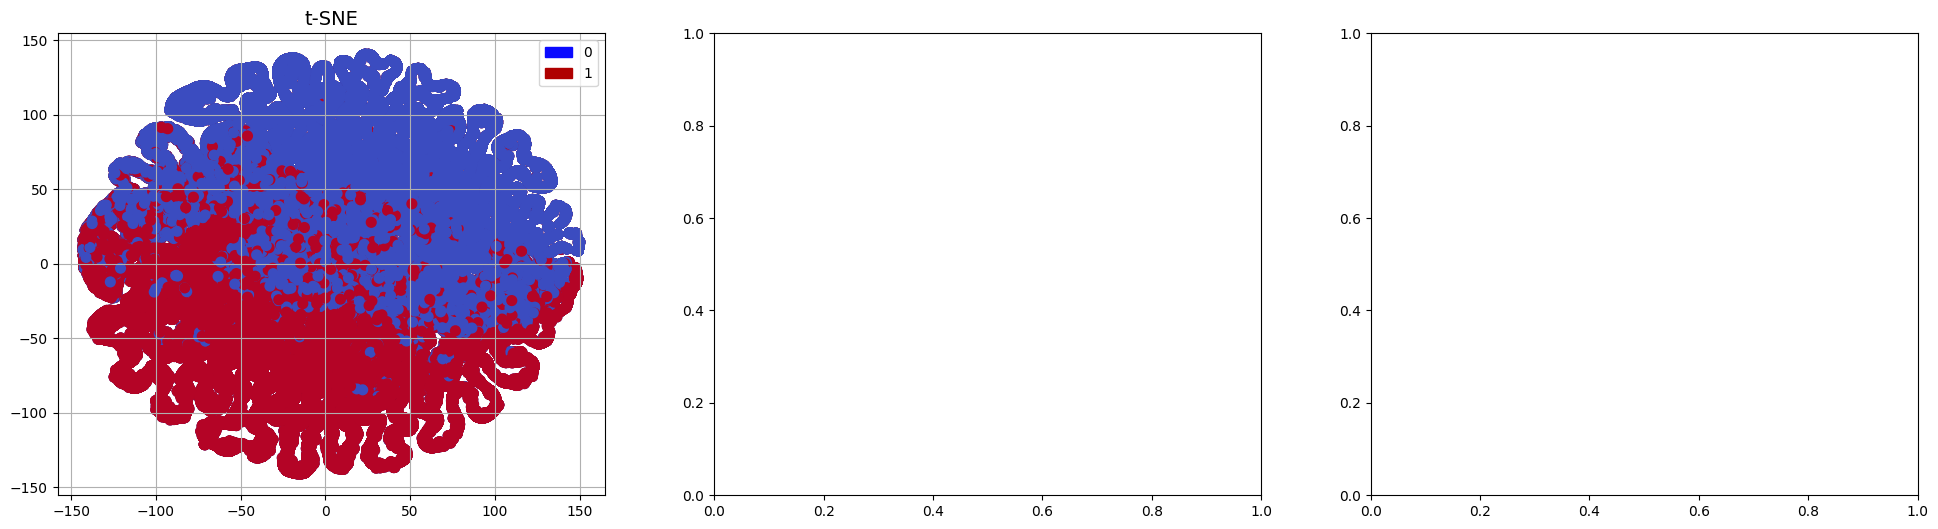

In [143]:
import matplotlib.patches as mpatches
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
red_patch = mpatches.Patch(color='#AF0000', label='1')

ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y_tsne == 0), cmap='coolwarm', label='0', linewidths=2)
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y_tsne == 1), cmap='coolwarm', label='1', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

In [185]:
x_input = new_df.drop(['target'], axis = 1)
y_input = new_df['target']


In [186]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 100000)
model.fit(x_input, y_input)

LogisticRegression(max_iter=100000)

In [187]:
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(model, x_input, y_input, cv=5)
round(training_score.mean(), 2) * 100

98.0

In [188]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(max_iter = 1000000), log_reg_params, error_score='raise')
grid_log_reg.fit(x_input, y_input)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, x_input, y_input, cv=5)
round(log_reg_score.mean() * 100, 2)

98.45

In [161]:
x_test = pd.read_csv('Test_20/X_Test_Data_Input.csv')
y_test = pd.read_csv('Test_20/Y_Test_Data_Target.csv')
x_test['target'] = y_test['target']

In [162]:
x_test = x_test.drop(['ID', 'Column9'], axis=1)

In [163]:
x_test['target'].value_counts()

target
0    237034
1     24678
Name: count, dtype: int64

In [164]:
x_test.isnull().sum()

Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

In [165]:
indices_to_drop = []
for i in range(len(x_test)):
    if pd.isna(x_test.loc[i, 'Column14']) and x_test.loc[i, 'target'] == 0:
        indices_to_drop.append(i)

x_test = x_test.drop(indices_to_drop)
x_test.reset_index(drop=True, inplace=True)

In [166]:
x_test.isnull().sum()

Column0         0
Column1         0
Column2         0
Column3     12518
Column4     12653
Column5      7464
Column6       171
Column7         0
Column8       171
Column10        0
Column11        0
Column12        0
Column13        0
Column14    20369
Column15     2426
Column16        0
Column17        0
Column18        0
Column19        0
Column20        0
Column21        0
target          0
dtype: int64

In [167]:
x_test['target'].value_counts()

target
0    135724
1     24678
Name: count, dtype: int64

In [169]:
t0 = time.time()
knn = KNNImputer()
x_test_knn = knn.fit_transform(x_test)
t1 = time.time()
print("KNN took {:.2} s".format(t1 - t0))

KNN took 1.6e+02 s


In [208]:
no_null_x_test = x_test.copy()
no_null_x_test[:] = pd.DataFrame(x_test_knn, columns=x_test.columns, index=x_test.index)
equal_dist = no_null_x_test.copy()
no_null_y_test = no_null_x_test['target']
no_null_x_test = no_null_x_test.drop('target', axis = 1)

/var/folders/qr/80j1cy4s5q542dmdc5lwzzqc0000gn/T/ipykernel_5556/159109448.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         1986.0
1         1579.0
2           79.0
3         2421.0
4         2495.0
           ...  
160397    2495.0
160398    2470.0
160399    2495.0
160400    1321.0
160401     963.0
Name: Column1, Length: 160402, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  no_null_x_test[:] = pd.DataFrame(x_test_knn, columns=x_test.columns, index=x_test.index)
/var/folders/qr/80j1cy4s5q542dmdc5lwzzqc0000gn/T/ipykernel_5556/159109448.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
160397    0.0
160398    0.0
160399    0.0
160400    0.0
160401    0.0
Name: Column10, Length: 160402, dtype:

In [189]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming `log_reg` is your trained logistic regression model
# `X_test` is your test set features
# `y_test` is the true labels for the test set

# Step 1: Make predictions
y_pred = log_reg.predict(no_null_x_test)

# Step 2: Calculate metrics
accuracy = accuracy_score(no_null_y_test, y_pred)
precision = precision_score(no_null_y_test, y_pred)
recall = recall_score(no_null_y_test, y_pred)
f1 = f1_score(no_null_y_test, y_pred)

# Step 3: Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9772
Precision: 0.8739
Recall: 0.9951
F1 Score: 0.9306


In [194]:
# Ensure the index is reset
x_input = x_input.reset_index(drop=True)
y_input = y_input.reset_index(drop=True)

# Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Stratified K-Fold Cross-Validation on training data
for train_index, test_index in skf.split(x_input, y_input):
    X_train_fold, X_test_fold = x_input.iloc[train_index], x_input.iloc[test_index]
    y_train_fold, y_test_fold = y_input.iloc[train_index], y_input.iloc[test_index]
    
    # Train the model on the training fold
    log_reg.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the test fold
    y_pred_fold = log_reg.predict(X_test_fold)
    
    # Calculate and store metrics for the fold
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    precision_scores.append(precision_score(y_test_fold, y_pred_fold))
    recall_scores.append(recall_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold))

# Evaluate the model on the separate test data
y_test_pred = log_reg.predict(no_null_x_test)

# Calculate final metrics on the test data
final_accuracy = accuracy_score(no_null_y_test, y_test_pred)
final_precision = precision_score(no_null_y_test, y_test_pred)
final_recall = recall_score(no_null_y_test, y_test_pred)
final_f1 = f1_score(no_null_y_test, y_test_pred)

# Print the mean metrics from cross-validation
print(f"Mean CV Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean CV Precision: {np.mean(precision_scores):.4f}")
print(f"Mean CV Recall: {np.mean(recall_scores):.4f}")
print(f"Mean CV F1 Score: {np.mean(f1_scores):.4f}")

# Print the final metrics on the test data
print(f"Test Data Accuracy: {final_accuracy:.4f}")
print(f"Test Data Precision: {final_precision:.4f}")
print(f"Test Data Recall: {final_recall:.4f}")
print(f"Test Data F1 Score: {final_f1:.4f}")


Mean CV Accuracy: 0.9845
Mean CV Precision: 0.9744
Mean CV Recall: 0.9951
Mean CV F1 Score: 0.9846
Test Data Accuracy: 0.9771
Test Data Precision: 0.8734
Test Data Recall: 0.9951
Test Data F1 Score: 0.9303


In [206]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities
y_proba = log_reg.predict_proba(no_null_x_test)[:, 1]

# Set a new threshold
threshold = 0.80
y_pred_adjusted = (y_proba > threshold).astype(int)

# Calculate metrics
precision = precision_score(no_null_y_test, y_pred_adjusted)
recall = recall_score(no_null_y_test, y_pred_adjusted)
f1 = f1_score(no_null_y_test, y_pred_adjusted)
accuracy = accuracy_score(no_null_y_test, y_pred_adjusted)
print(f"Adjusted Precision: {precision:.4f}")
print(f"Adjusted Recall: {recall:.4f}")
print(f"Adjusted F1 Score: {f1:.4f}")
print(f"Adjusted Accuracy Score: {accuracy:.4f}")

Adjusted Precision: 0.9089
Adjusted Recall: 0.9739
Adjusted F1 Score: 0.9403
Adjusted Accuracy Score: 0.9810


In [211]:
equal_dist = equal_dist.sample(frac=1)
one_test = equal_dist.loc[equal_dist['target'] == 1]
zero_test = equal_dist.loc[equal_dist['target'] == 0].sample(n=24678, random_state=42)

normal_distributed_test_df = pd.concat([one_test, zero_test])

# Shuffle dataframe rows
new_test_df = normal_distributed_test_df.sample(frac=1, random_state=42)


In [212]:
y_test_equal = new_test_df['target']
x_test_equal = new_test_df.drop('target', axis = 1)

In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities
y_proba = log_reg.predict_proba(x_test_equal)[:, 1]

# Set a new threshold
threshold = 0.8
y_pred_adjusted = (y_proba > threshold).astype(int)

# Calculate metrics
precision = precision_score(y_test_equal, y_pred_adjusted)
recall = recall_score(y_test_equal, y_pred_adjusted)
f1 = f1_score(y_test_equal, y_pred_adjusted)
accuracy = accuracy_score(y_test_equal, y_pred_adjusted)
print(f"Adjusted Precision: {precision:.4f}")
print(f"Adjusted Recall: {recall:.4f}")
print(f"Adjusted F1 Score: {f1:.4f}")
print(f"Adjusted Accuracy Score: {accuracy:.4f}")

Adjusted Precision: 0.9819
Adjusted Recall: 0.9739
Adjusted F1 Score: 0.9779
Adjusted Accuracy Score: 0.9780
